In [3]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


## Binomial Distribution

### Null Hypothesis for different tests:
#### KS: Sample from a Binomial distribution fits a Gaussian distribution
#### AD: Sample from Binomial distribution fits Gaussian distribution
#### KL: There is no information lost from Binomial distribution compared with Gaussian distribution
#### CHI^2: The observed frequencies of Binomial distribution is consistent with expected frequencies of Gaussian distribution.
#### Significant level: alpha = 0.05

In [69]:
narray = range(1, 600, 1)
ks_s_b = np.zeros(len(narray))
ks_p_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi_s_b = np.zeros(len(narray))
chi_p_b = np.zeros(len(narray))

In [70]:
np.random.seed(999)
narray = range(1, 600, 1)
#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    ad_b[i] = ad_b[i] / ad_b[0]
    
    hist, mybins = np.histogram(dist,normed=True)
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    
    kl_b[i] =  scipy.stats.entropy(hist, 
                                    scipy.stats.norm.pdf(bincenters))
    
    chi_s_b[i] = scipy.stats.chisquare(hist, 
                                    scipy.stats.norm.pdf(bincenters))[0]
    
    chi_p_b[i] = scipy.stats.chisquare(hist, 
                                    scipy.stats.norm.pdf(bincenters))[1]
    
    

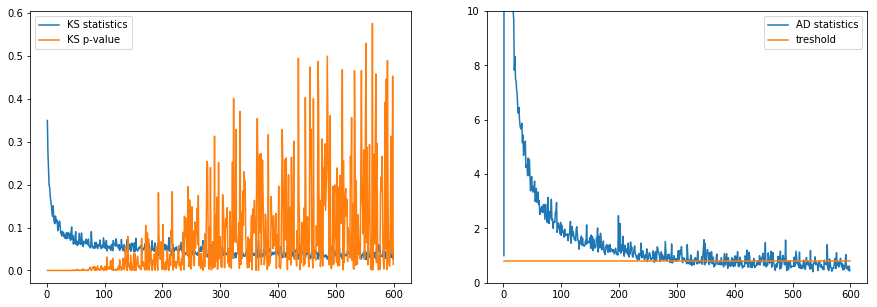

In [71]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(121)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(122)
threshold = scipy.stats.anderson(dist, dist='norm')[1][scipy.stats.anderson(dist, dist='norm')[2]==[5.0]]
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) 
pl.legend()



#### Figure 1&2: KS test and AD test for the relation between Binomial Distribution and Gaussian Ditribution

#### Conclusion for KS test : From the plot we can observe that as n increases the P-value increases  dramatically and the probability for P-value being larger than $alpha$=0.05 also increases. Hence as n increases the probability that the H0 cannot be rejected is higher, which indicates higher correlation between the two distributions at larger n.

#### Conclusion for AD test: From the plot we can observe that as n increases the AD statistics decreases  dramatically and the probability for AD statistic being smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784) increases. Hence as n increases the probability that the H0 cannot be rejected is higher, which indicates higher correlation between the two distributions at larger n.

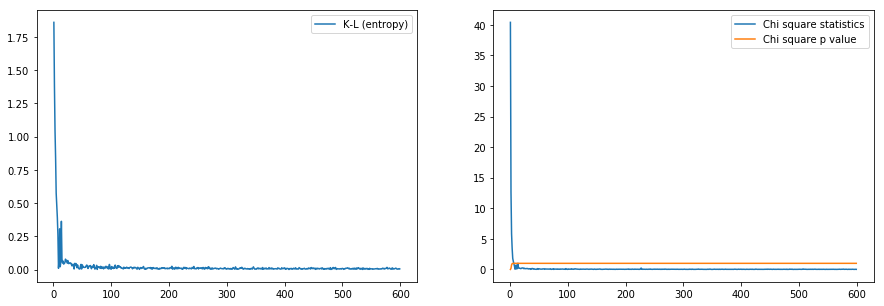

In [72]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(121)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.legend()

fig.add_subplot(122)
pl.plot(narray, chi_s_b, label = 'Chi square statistics')
pl.plot(narray, chi_p_b, label = 'Chi square p value')
pl.legend()


#### Figure 3&4: K-L test and Pearson's Chi square test for the relation between Binomial Distribution and Gaussian Distribution

#### Conclusion for K-L test: the K-L test returns information entropy. Larger entropy indicates higher degree of uncertainty, in this case which means higher disagreement between Binomial distribution and Gaussian disribution. From the plot we can observe that entropy decreases as n increases. Hence larger n indicates higher degree of correlation between the two distributions.

#### Conclusion for Chi Square Test: from the plot we can observe that as n increases, the p-value stays at the vicinity of 1 which is significantly higher that alpha = 0.05. hence the null hypothesis that binomial ditribution and Gaussian ditribution is consistent cannot be rejected. 

## Poisson Distribution

### Null Hypothesis for different tests
### KS: Poisson distribution and Gaussian distribution are identical
### AD: Poisson distribution and Gaussian distribution are identical
### KL: There is no information lost from Poisson distribution compared with Gaussian distribution
### CHI^2: The observed frequencies of Poisson distribution is consistent with expected frequencies of Gaussian distribution.

In [76]:
narray = range(1, 600, 1)
ks_s_p = np.zeros(len(narray))
ks_p_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))
chi_s_p = np.zeros(len(narray))
chi_p_p = np.zeros(len(narray))

In [84]:
np.random.seed(999)
narray = range(1, 600, 1)
#loop over the different values of lambda (L)
for i,L in enumerate(narray):
    #generate the distribution
    dist = (np.random.poisson(L, 1000) - L) / np.sqrt(L)
    ks_s_p[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_p[i] = scipy.stats.kstest(dist,'norm')[1]
   
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    ad_p[i] = ad_b[i] / ad_b[0]
    
    hist, mybins = np.histogram(dist,normed=True)
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    
    kl_p[i] =  scipy.stats.entropy(hist, 
                                    scipy.stats.norm.pdf(bincenters))
    
    chi_s_p[i] = scipy.stats.chisquare(hist, 
                                    scipy.stats.norm.pdf(bincenters))[0]
    
    chi_p_p[i] = scipy.stats.chisquare(hist, 
                                    scipy.stats.norm.pdf(bincenters))[1]
    

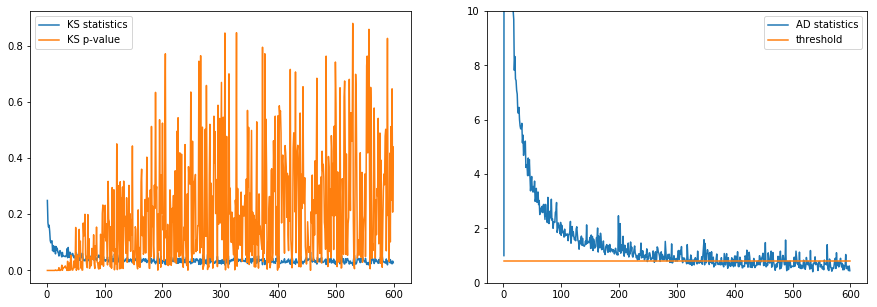

In [85]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(121)
pl.plot(narray, ks_s_p, label='KS statistics')
pl.plot(narray, ks_p_p, label='KS p-value')
pl.legend()

fig.add_subplot(122)
threshold = scipy.stats.anderson(dist, dist='norm')[1][scipy.stats.anderson(dist, dist='norm')[2]==[5.0]]
pl.plot(narray, ad_p,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

#### Figure 5&6: KS test and AD test for the relation between Poissonl Distribution and Gaussian Ditribution

#### Conclusion for KS test : From the plot we can observe that as lambda increases the P-value increases  dramatically and the probability for P-value being larger than $alpha$=0.05 also increases. Hence as lambda increases the probability that the H0 cannot be rejected is higher, which indicates higher correlation between the two distributions at larger lambda.

#### Conclusion for AD test: From the plot we can observe that as lambda increases the AD statistics decreases  dramatically and the probability for AD statistic being smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784) increases. Hence as lambda increases the probability that the H0 cannot be rejected is higher, which indicates higher correlation between the two distributions at larger lambda. 

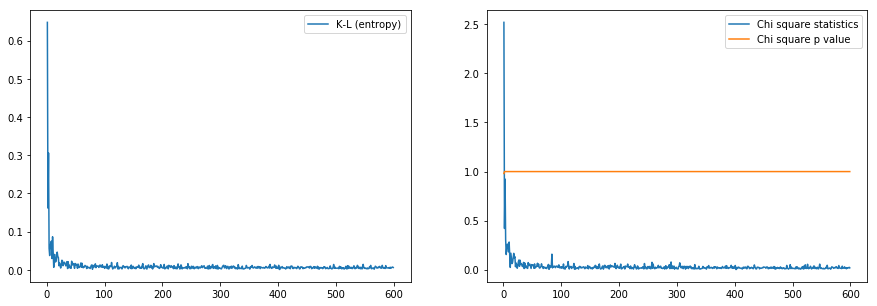

In [86]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(121)
pl.plot(narray, kl_p, label='K-L (entropy)')
pl.legend()

fig.add_subplot(122)
pl.plot(narray, chi_s_p, label = 'Chi square statistics')
pl.plot(narray, chi_p_p, label = 'Chi square p value')
pl.legend()

#### Figure 7&8: K-L test and Pearson's Chi square test for the relation between Poisson Distribution and Gaussian Distribution

#### Conclusion for K-L test: the K-L test returns information entropy. Larger entropy indicates higher degree of uncertainty, in this case which means higher disagreement between Poisson distribution and Gaussian disribution. From the plot we can observe that entropy decreases as lambda increases. Hence larger lambda indicates higher degree of correlation between the two distributions.

#### Conclusion for Chi Square Test: from the plot we can observe that as lambda increases, the p-value stays at the vicinity of 1 which is significantly higher that alpha = 0.05. hence the null hypothesis that poisson ditribution and Gaussian ditribution is consistent cannot be rejected. 

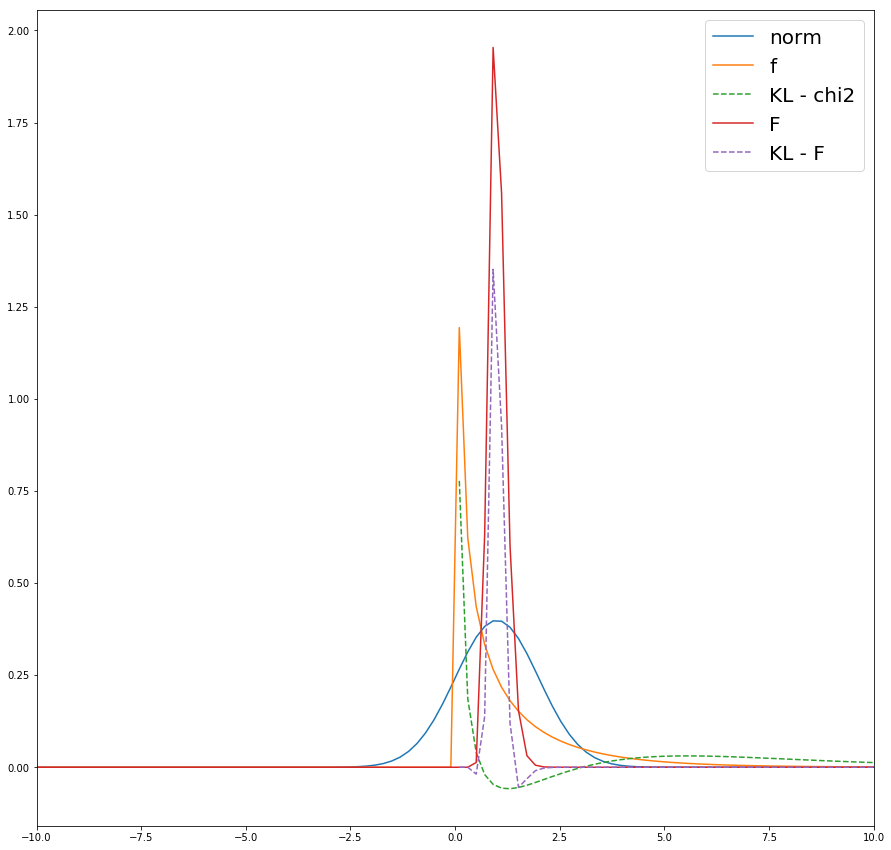

In [60]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  - p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);